In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split as split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [9]:
data = pd.read_excel('/Users/parvezshahshaik/Documents/Github/heartattack_project/heartattack_data/Data.xlsx')

In [10]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.duplicated().sum()

1

### Dealing with the duplicates

In [13]:
data.drop_duplicates(inplace = True) 

data.reset_index(drop = True, inplace = True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.324503    0.543046  
std      0.588366    0.498970  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### Changing the variable names for better understanding

In [16]:
data.rename(
    {
     'cp' :'chest_pain_type',
     'trestbps':'resting_blood_pressure',
     'chol':'cholesterol',
     'fbs' :'fasting_blood_sugar', 
     'restecg':'resting_ecg',
     'thalach' : 'max_heart_rate', 
     'exang':'exercise_induced_angina', 
     'oldpeak':'st_depression',
     'slope':'st_slope',
     'ca' : 'major_vessels',
     'thal' :'thalessimia' 
    },axis = 1, inplace = True)

In [17]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

### Creating Categorical columns for better understanding

In [18]:
cat =['sex','chest_pain_type','fasting_blood_sugar','exercise_induced_angina','st_slope','thalessimia']

In [19]:
#statistical description
data.loc[ : , ~data.columns.isin(cat)].describe()

age  resting_blood_pressure  cholesterol  resting_ecg  \
count  302.00000              302.000000   302.000000   302.000000   
mean    54.42053              131.602649   246.500000     0.526490   
std      9.04797               17.563394    51.753489     0.526027   
min     29.00000               94.000000   126.000000     0.000000   
25%     48.00000              120.000000   211.000000     0.000000   
50%     55.50000              130.000000   240.500000     1.000000   
75%     61.00000              140.000000   274.750000     1.000000   
max     77.00000              200.000000   564.000000     2.000000   

       max_heart_rate  st_depression  major_vessels      target  
count      302.000000     302.000000     302.000000  302.000000  
mean       149.569536       1.043046       0.718543    0.543046  
std         22.903527       1.161452       1.006748    0.498970  
min         71.000000       0.000000       0.000000    0.000000  
25%        133.250000       0.000000       0.000000    0.000000  
50%        152.500000       0.800000       0.000000    1.000000  
75%        166.000000       1.600000       1.000000    1.000000  
max        202.000000       6.200000       4.000000    1.000000

In [20]:
desc = pd.DataFrame(index=cat)
desc['nuinque'] = data[cat].apply(lambda x: x.nunique(), axis=0)
desc['unique'] = 0

for i in cat:
    desc.loc[i, 'unique'] = str(list(data[i].value_counts().index))

desc = desc.T
desc

sex chest_pain_type fasting_blood_sugar exercise_induced_angina  \
nuinque       2               4                   2                       2   
unique   [1, 0]    [0, 2, 1, 3]              [0, 1]                  [0, 1]   

          st_slope thalessimia  
nuinque          3           3  
unique   [2, 1, 0]   [2, 3, 1]

In [21]:
data.thalessimia.value_counts()

thalessimia
2    166
3    117
1     19
Name: count, dtype: int64

In [22]:
data.loc[data.thalessimia == 0, 'thalessimia'] = 2 #Substituting o value rows with 2 could be a method of imputation

In [23]:
data.loc[data.sex == 0 , 'sex'] = 'female'
data.loc[data.sex == 1, 'sex'] = 'male'

data.loc[data.chest_pain_type == 0,'chest_pain_type'] = 'typical angina'
data.loc[data.chest_pain_type == 1,'chest_pain_type'] = 'atypical angina'
data.loc[data.chest_pain_type == 2,'chest_pain_type'] = 'non-anginal pain'
data.loc[data.chest_pain_type == 3,'chest_pain_type'] = 'asymptomatic'

data.loc[data.fasting_blood_sugar == 0,'fasting_blood_sugar'] = '< 120mg/ml'
data.loc[data.fasting_blood_sugar == 1,'fasting_blood_sugar'] = '> 120mg/ml'

data.loc[data.resting_ecg == 0, 'resting_ecg']  = 'normal'
data.loc[data.resting_ecg == 1 , 'resting_ecg'] = 'abnormal'
data.loc[data.resting_ecg == 2 , 'resting_ecg'] = 'hyper'

data.loc[data.exercise_induced_angina == 0, 'exercise_induced_angina'] = 'no'
data.loc[data.exercise_induced_angina == 1, 'exercise_induced_angina'] = 'yes'

data.loc[data.st_slope == 0, 'st_slope'] = 'upsloping'
data.loc[data.st_slope == 1, 'st_slope'] = 'flat'
data.loc[data.st_slope == 2, 'st_slope'] = 'downsloping'

data.loc[data.thalessimia == 1,'thalessimia'] = 'normal'
data.loc[data.thalessimia == 2,'thalessimia'] = 'fixed defect'
data.loc[data.thalessimia == 3,'thalessimia'] = 'reversable defect'


In [24]:
dsprsnt = data[data.target == 1].copy()
dsabsnt = data[data.target == 0].copy()

### Studying occurrence of CVD across different ages.

In [45]:
vc = data.target.value_counts()
vc

target
1    164
0    138
Name: count, dtype: int64

In [102]:
# Check unique values in the 'target' column
unique_targets = data['target'].unique()
print(unique_targets)


[1 0]


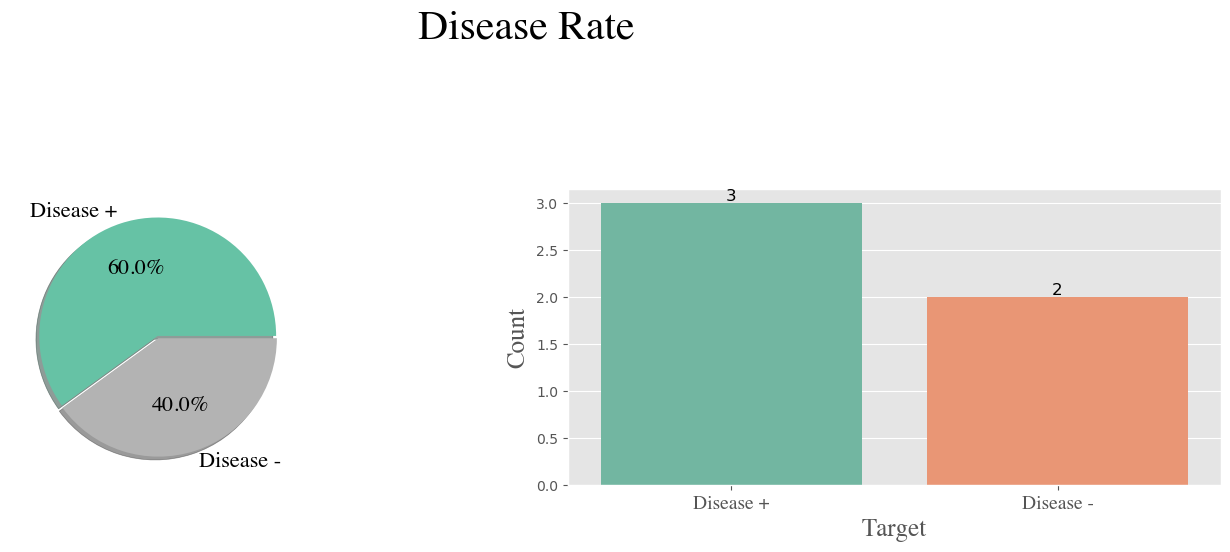

In [108]:
# Assuming vc is a Pandas Series or list containing data for the pie chart
vc = pd.Series([60, 40])  # Example data

# Assuming 'data' contains the dataset for the count plot
# Replace 'data.target' with the appropriate column name from your dataset
data = pd.DataFrame({'target': ['Disease +', 'Disease -', 'Disease +', 'Disease -', 'Disease +']})  

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot no. 1 - Pie chart
vc.plot.pie(ax=axes[0], radius=1, cmap='Set2', explode=[0.01, 0.01],
            shadow=True, autopct='%1.1f%%',
            textprops={'family': 'times', 'color': 'black', 'weight': 'bold', 'size': 16},
            labels=['Disease +', 'Disease -'])
axes[0].set_ylabel('')

# Plot no. 2 - Count plot
sns.countplot(data=data, x='target', ax=axes[1], palette='Set2')

# Calculate counts for annotation
count_values = data['target'].value_counts()

# Annotate count values on the count plot
for i, v in enumerate(count_values):
    axes[1].annotate(str(v), (i, v), ha='center', va='bottom', fontsize=12)

axes[1].set_xlabel('Target', fontsize=18, family='times')
axes[1].set_ylabel('Count', fontsize=18, family='times')
axes[1].set_xticklabels(['Disease +', 'Disease -'], fontsize=14, family='times')

fig.suptitle('Disease Rate\n', fontsize=30, family='times')
plt.tight_layout(pad=4)
plt.show()


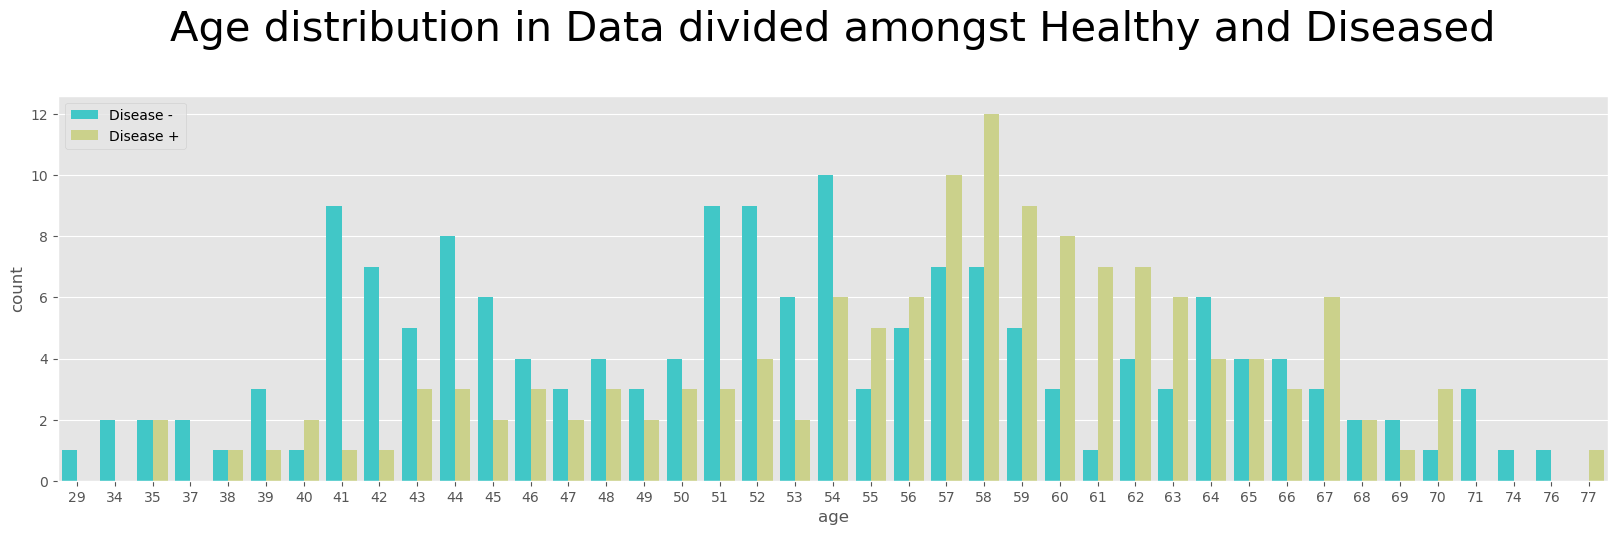

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'target' column to strings
data['target'] = data['target'].astype(str)

plt.figure(figsize=(20, 5))
sns.countplot(data=data, x='age', hue='target', palette='rainbow')
plt.legend(['Disease -', 'Disease +'], loc='upper left')
plt.title('Age distribution in Data divided amongst Healthy and Diseased\n', fontsize=30)
plt.show()



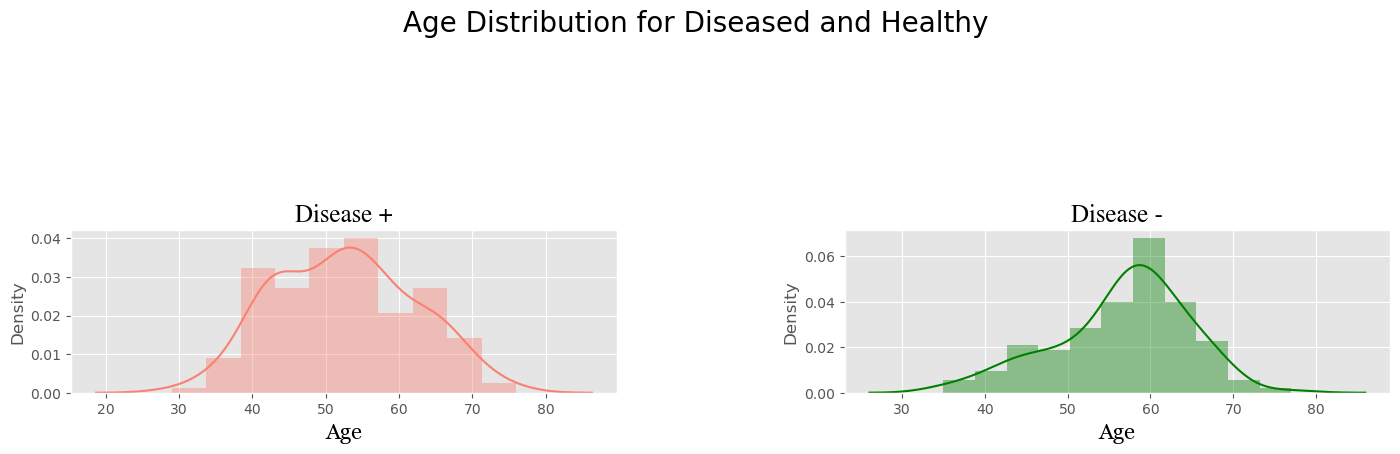

In [64]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(dsprsnt.age, ax=axes[0], color='salmon')
sns.distplot(dsabsnt.age, ax=axes[1], color='green')

axes[0].set_title('Disease +', fontdict={'family': 'times', 'size': 18})
axes[1].set_title('Disease -', fontdict={'family': 'times', 'size': 18})

axes[0].set_xlabel('Age', fontdict={'family': 'georgia', 'color': 'black', 'weight': 'normal', 'size': 16})
axes[1].set_xlabel('Age', fontdict={'family': 'georgia', 'color': 'black', 'weight': 'normal', 'size': 16})

f.suptitle('Age Distribution for Diseased and Healthy\n\n', fontsize=20)
plt.tight_layout(w_pad=12, pad=4)
plt.show()



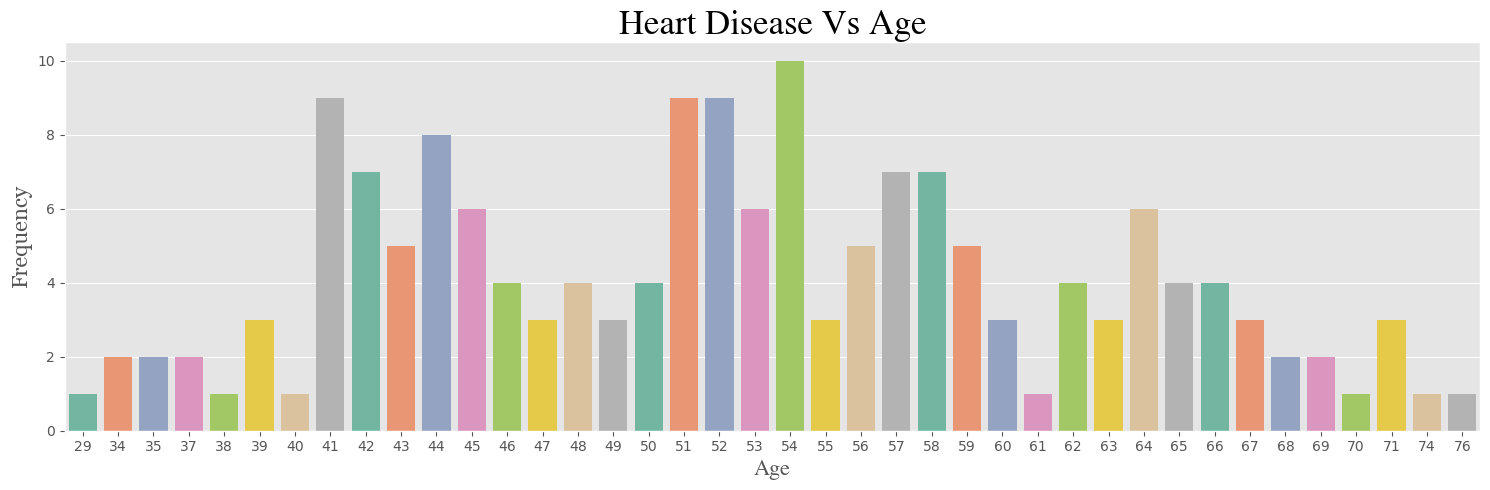

In [65]:
plt.figure(figsize=(15, 5))
sns.countplot(x='age', data=dsprsnt, palette='Set2')
plt.title('Heart Disease Vs Age', family='times', weight='bold', fontsize=25)
plt.xlabel('Age', family='times', fontsize=16)
plt.ylabel('Frequency', family='georgia', fontsize=16)
plt.tight_layout()
plt.show()


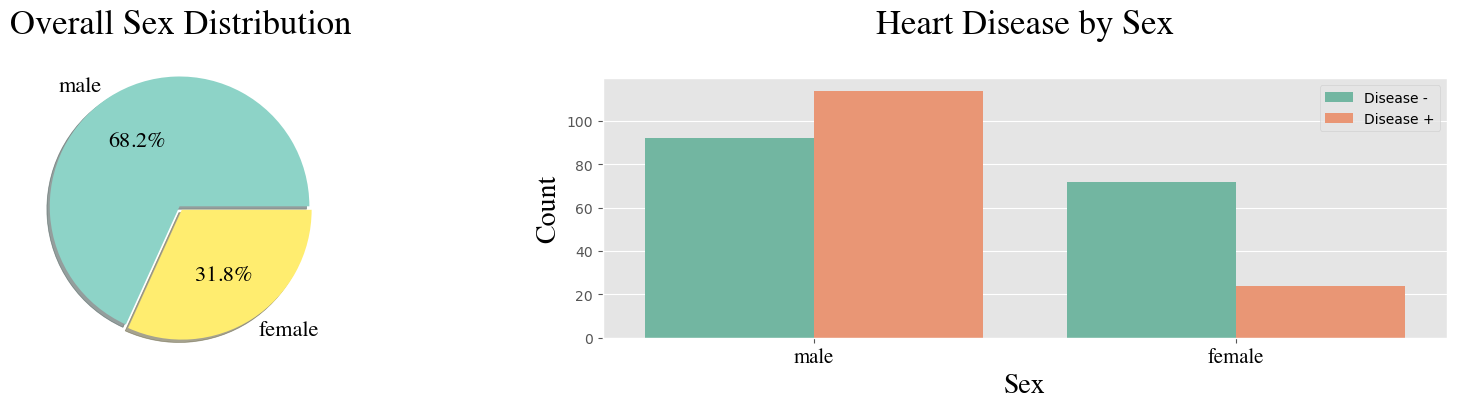

In [66]:
def cat_plot(var):
    f, axes = plt.subplots(1, 2, figsize=(18, 5))
    vc = data[var].value_counts()
    nouniq = data[var].nunique()
    
    # Overall pie chart
    vc.plot.pie(radius=1.25, ax=axes[0], cmap='Set3', autopct='%0.1f%%',
                 textprops={'family': 'times', 'color': 'black', 'weight': 'bold', 'size': 16},
                 explode=[0.02] * nouniq, shadow=True)
    axes[0].set_title('Overall {} Distribution\n'.format(var.capitalize()), 
                      family='times', weight='bold', fontsize=25)
    axes[0].set_ylabel('')

    # Count plot
    sns.countplot(x=data[var], hue=data.target, ax=axes[1], palette='Set2')
    plt.xticks(fontsize=15, color='black', family='times', rotation=0)
    axes[1].set_xlabel(var.capitalize(), fontsize=20, color='black', family='times', rotation=0)
    axes[1].set_ylabel('Count', fontsize=20, color='black', family='times')
    axes[1].legend(['Disease -', 'Disease +'])
    axes[1].set_title('Heart Disease by {}\n'.format(var.capitalize()), 
                      family='times', weight='bold', fontsize=25)
    
    plt.tight_layout(pad=4)
    plt.show()

def real_distribution(var):
    f, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(dsprsnt[var], ax=axes[0], color='salmon')
    sns.distplot(dsabsnt[var], ax=axes[0], color='green')
    sns.boxplot(y=data[var], x=data.target, ax=axes[1], palette='Set2')
    
    axes[0].set_xlabel(var, fontdict={'family': 'times', 'color': 'black', 'weight': 'normal', 'size': 16})
    axes[1].set_ylabel(var, fontdict={'family': 'times', 'color': 'black', 'weight': 'normal', 'size': 16})
    axes[1].set_xlabel('Target', fontdict={'family': 'times', 'color': 'black', 'weight': 'normal', 'size': 16})
    axes[1].set_xticklabels(['Disease -', 'Disease +'], {'family': 'times', 'color': 'black', 'weight': 'normal', 'size': 12})
    
    f.suptitle('{} vs Disease\n\n '.format(var.capitalize()), fontsize=20, family='times')
    plt.tight_layout(w_pad=12, pad=4)
    plt.show()

cat_plot('sex')


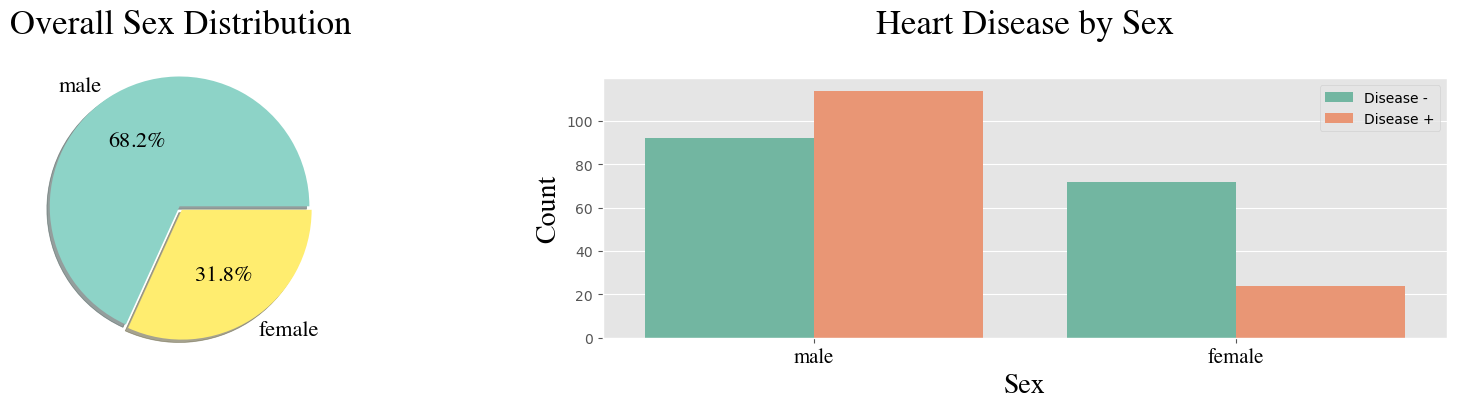

In [67]:
cat_plot('sex')

In [92]:
def real_distribution(var):
    f, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(dsprsnt[var], ax=axes[0], color='salmon')
    sns.distplot(dsabsnt[var], ax=axes[0], color='green')
    sns.boxplot(y=data[var], x=data.target, ax=axes[1], palette='Set2')
    
    axes[0].set_xlabel(var, fontdict={'family': 'times', 'color': 'black', 'weight': 'normal', 'size': 16})
    axes[1].set_ylabel(var, fontdict={'family': 'times', 'color': 'black', 'weight': 'normal', 'size': 16})
    axes[1].set_xlabel('Target', fontdict={'family': 'times', 'color': 'black', 'weight': 'normal', 'size': 16})
    axes[1].set_xticklabels(['Disease -', 'Disease +'], fontdict={'family': 'times', 'color': 'black', 'weight': 'normal', 'size': 12})
    
    f.suptitle('{} vs Disease\n\n '.format(var.capitalize()), fontsize=20, family='times')
    plt.tight_layout(w_pad=12, pad=4)
    plt.show()


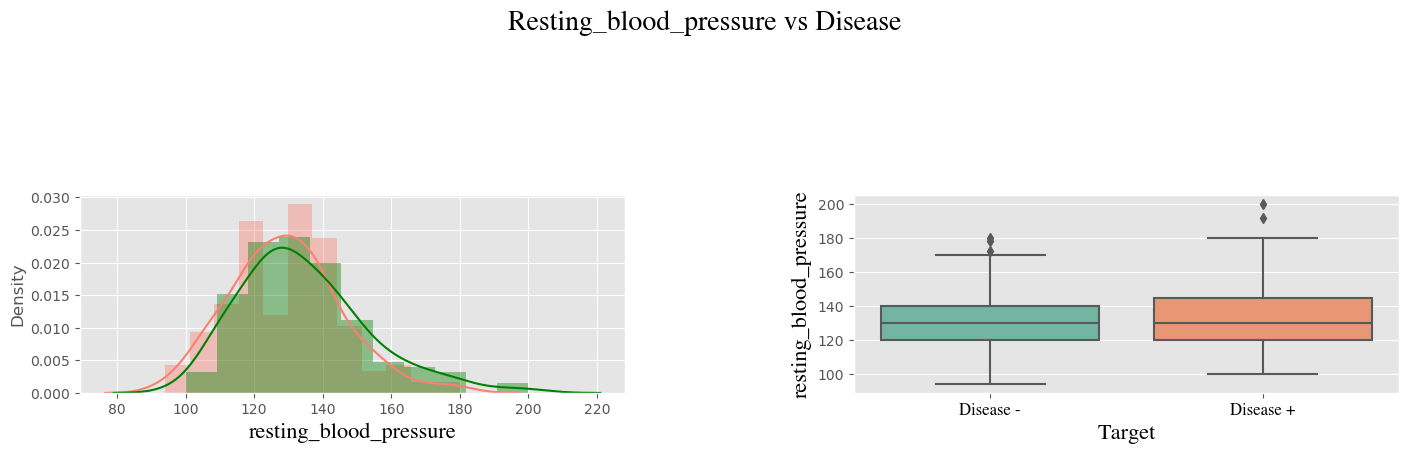

In [93]:
real_distribution('resting_blood_pressure')

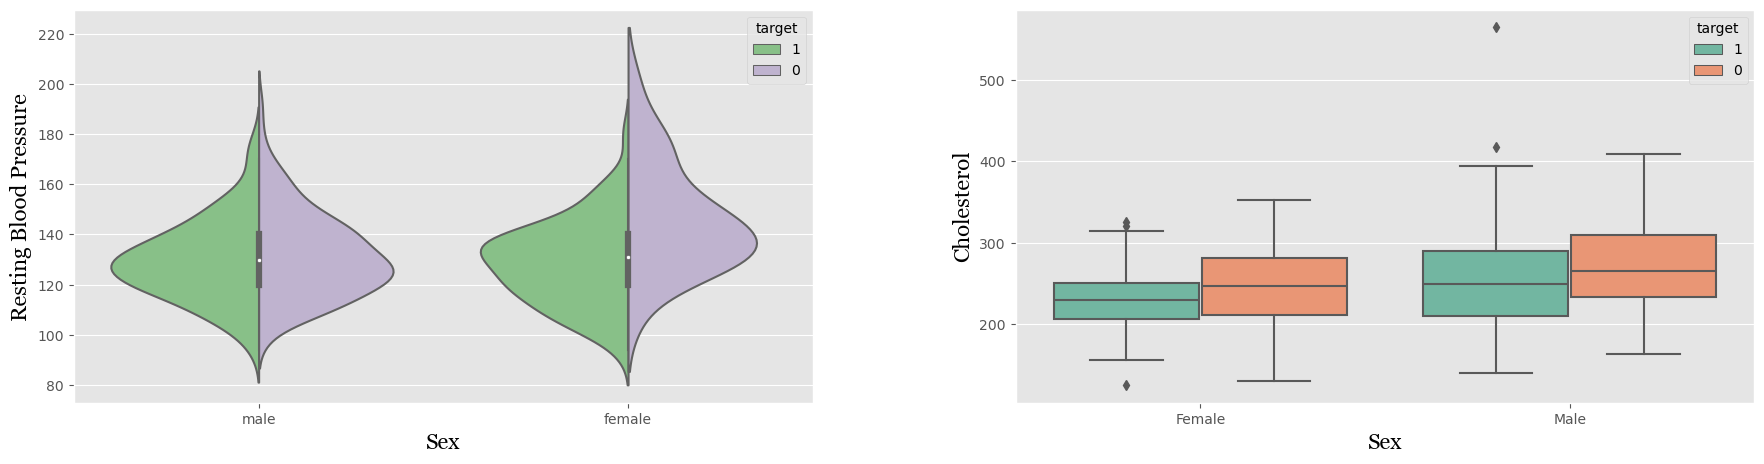

In [94]:
f, axes = plt.subplots(1, 2, figsize=(18, 5))

# Violin plot
sns.violinplot(y='resting_blood_pressure', x='sex', hue='target', data=data, split=True, palette='Accent', ax=axes[0])
axes[0].set_xlabel('Sex', fontdict={'family': 'georgia', 'color': 'black', 'weight': 'normal', 'size': 16})
axes[0].set_ylabel('Resting Blood Pressure', fontdict={'family': 'georgia', 'color': 'black', 'weight': 'normal', 'size': 16})

# Box plot
sns.boxplot(x='sex', y='cholesterol', hue='target', data=data, palette='Set2', ax=axes[1])
axes[1].set_xticklabels(['Female', 'Male'])
axes[1].set_xlabel('Sex', fontdict={'family': 'georgia', 'color': 'black', 'weight': 'normal', 'size': 16})
axes[1].set_ylabel('Cholesterol', fontdict={'family': 'georgia', 'color': 'black', 'weight': 'normal', 'size': 16})

plt.tight_layout(w_pad=10, pad=2)
plt.show()


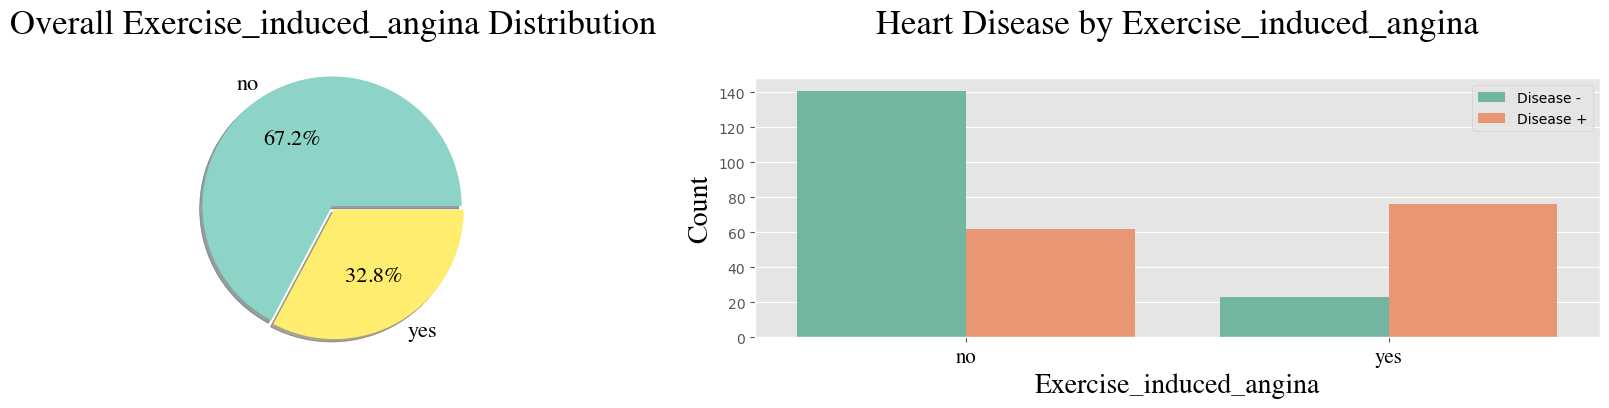

In [72]:
cat_plot('exercise_induced_angina')

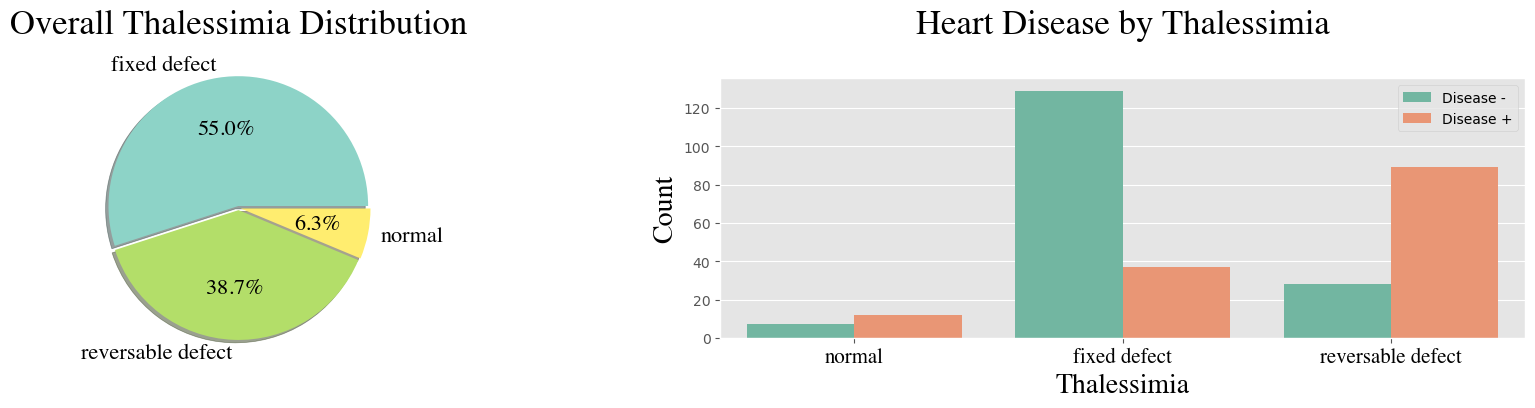

In [73]:
cat_plot('thalessimia')

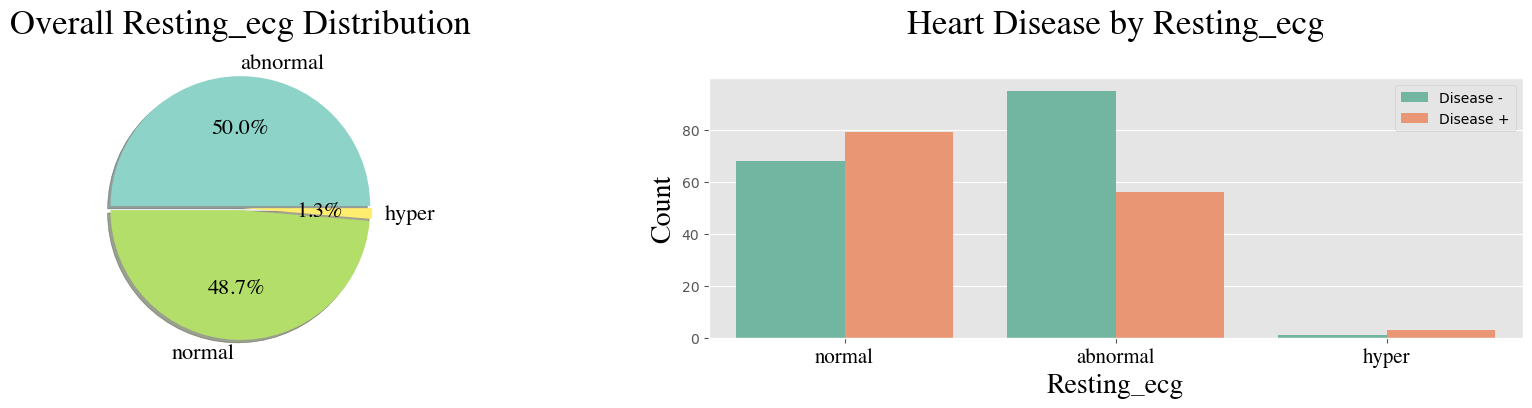

In [74]:
cat_plot('resting_ecg')

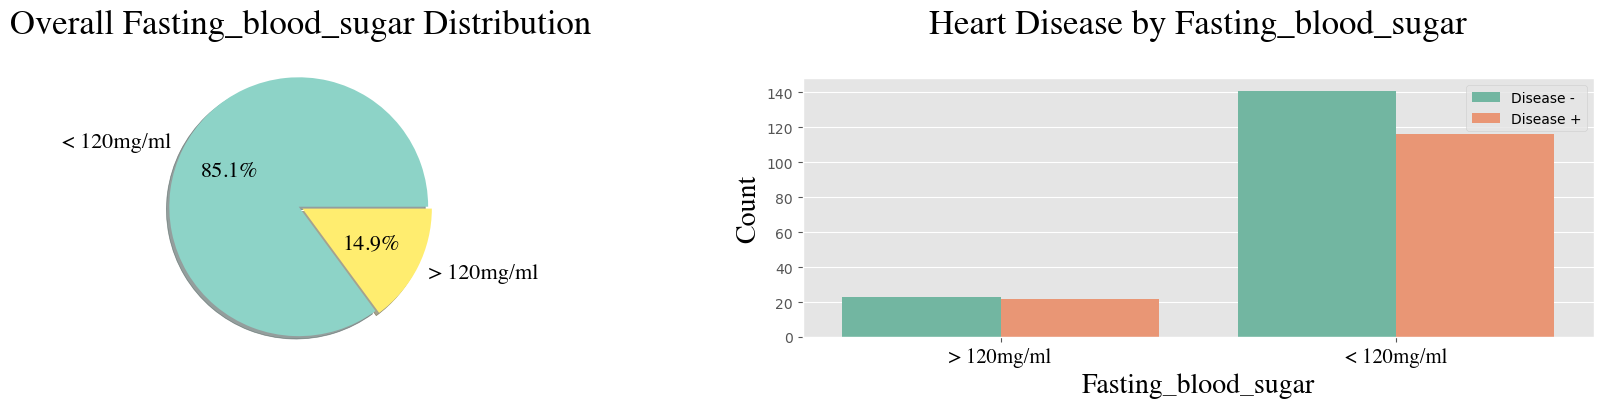

In [75]:
cat_plot('fasting_blood_sugar')

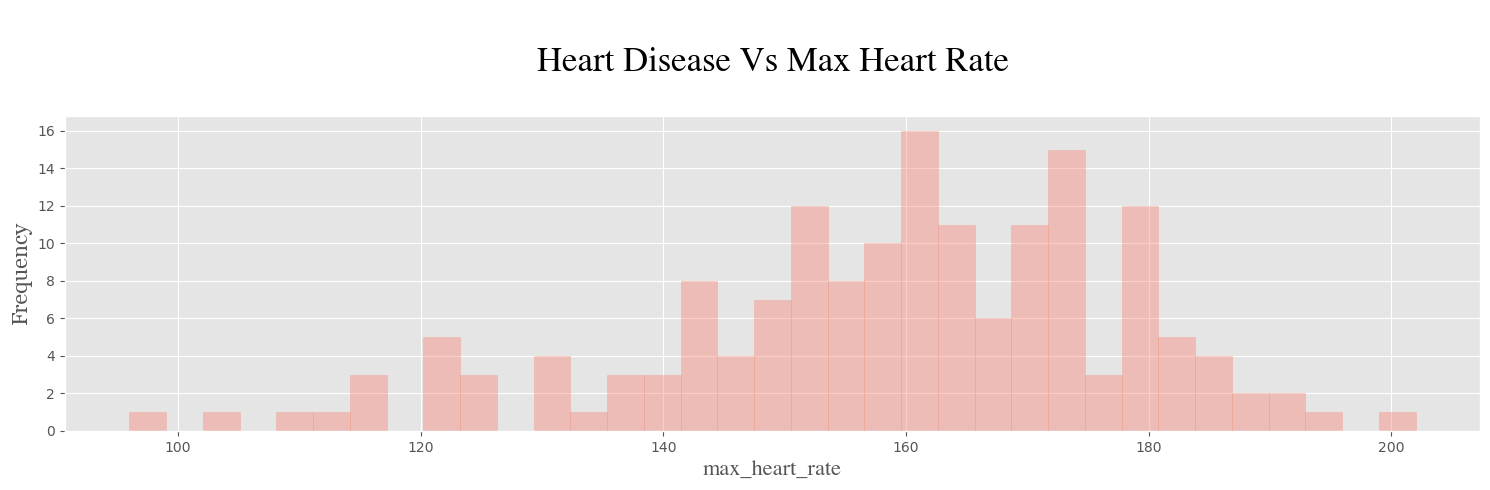

In [76]:
plt.figure(figsize=(15, 5))
sns.distplot(dsprsnt.max_heart_rate, kde=False, bins=35, hist_kws={'edgecolor': 'darksalmon', 'color': 'salmon'})
plt.title('\nHeart Disease Vs Max Heart Rate\n', family='times', weight='bold', fontsize=25)
plt.xlabel('max_heart_rate', family='times', fontsize=16)
plt.ylabel('Frequency', family='georgia', fontsize=16)
plt.tight_layout()
plt.show()


In [77]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

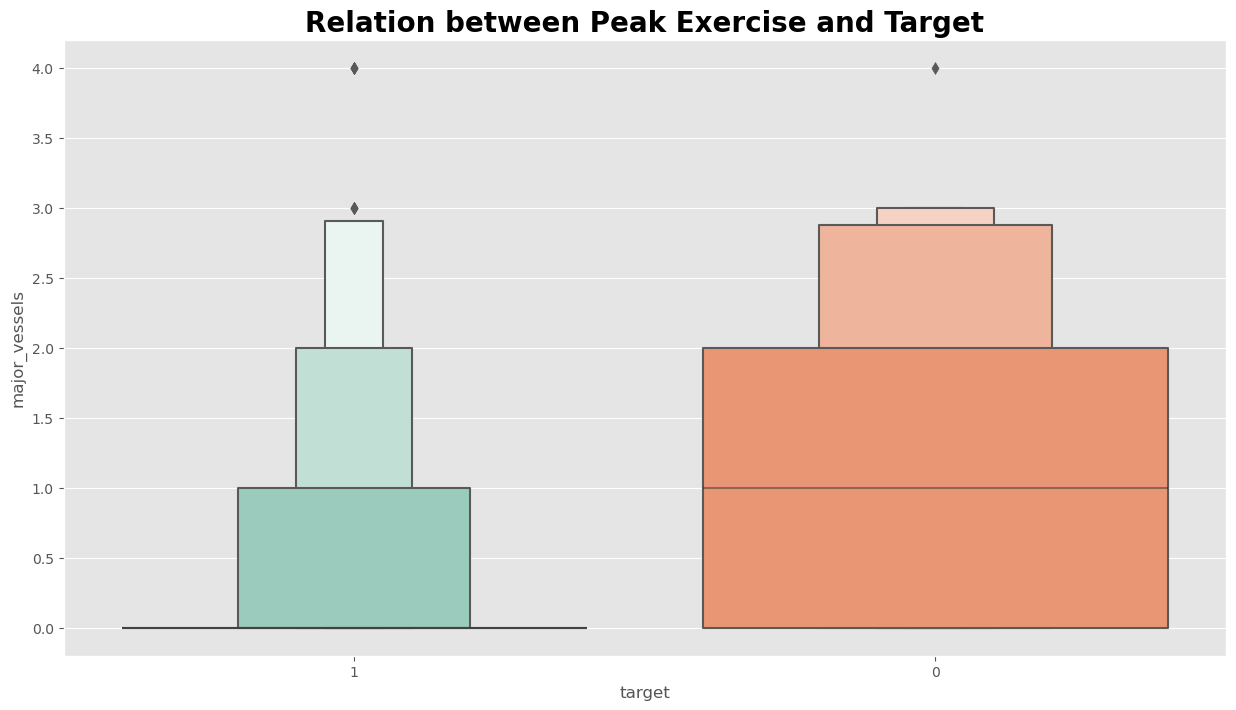

In [78]:
plt.figure(figsize=(15, 8))
sns.boxenplot(x='target', y='major_vessels', data=data, palette='Set2')
plt.title('Relation between Peak Exercise and Target', fontsize=20, fontweight='bold')
plt.show()


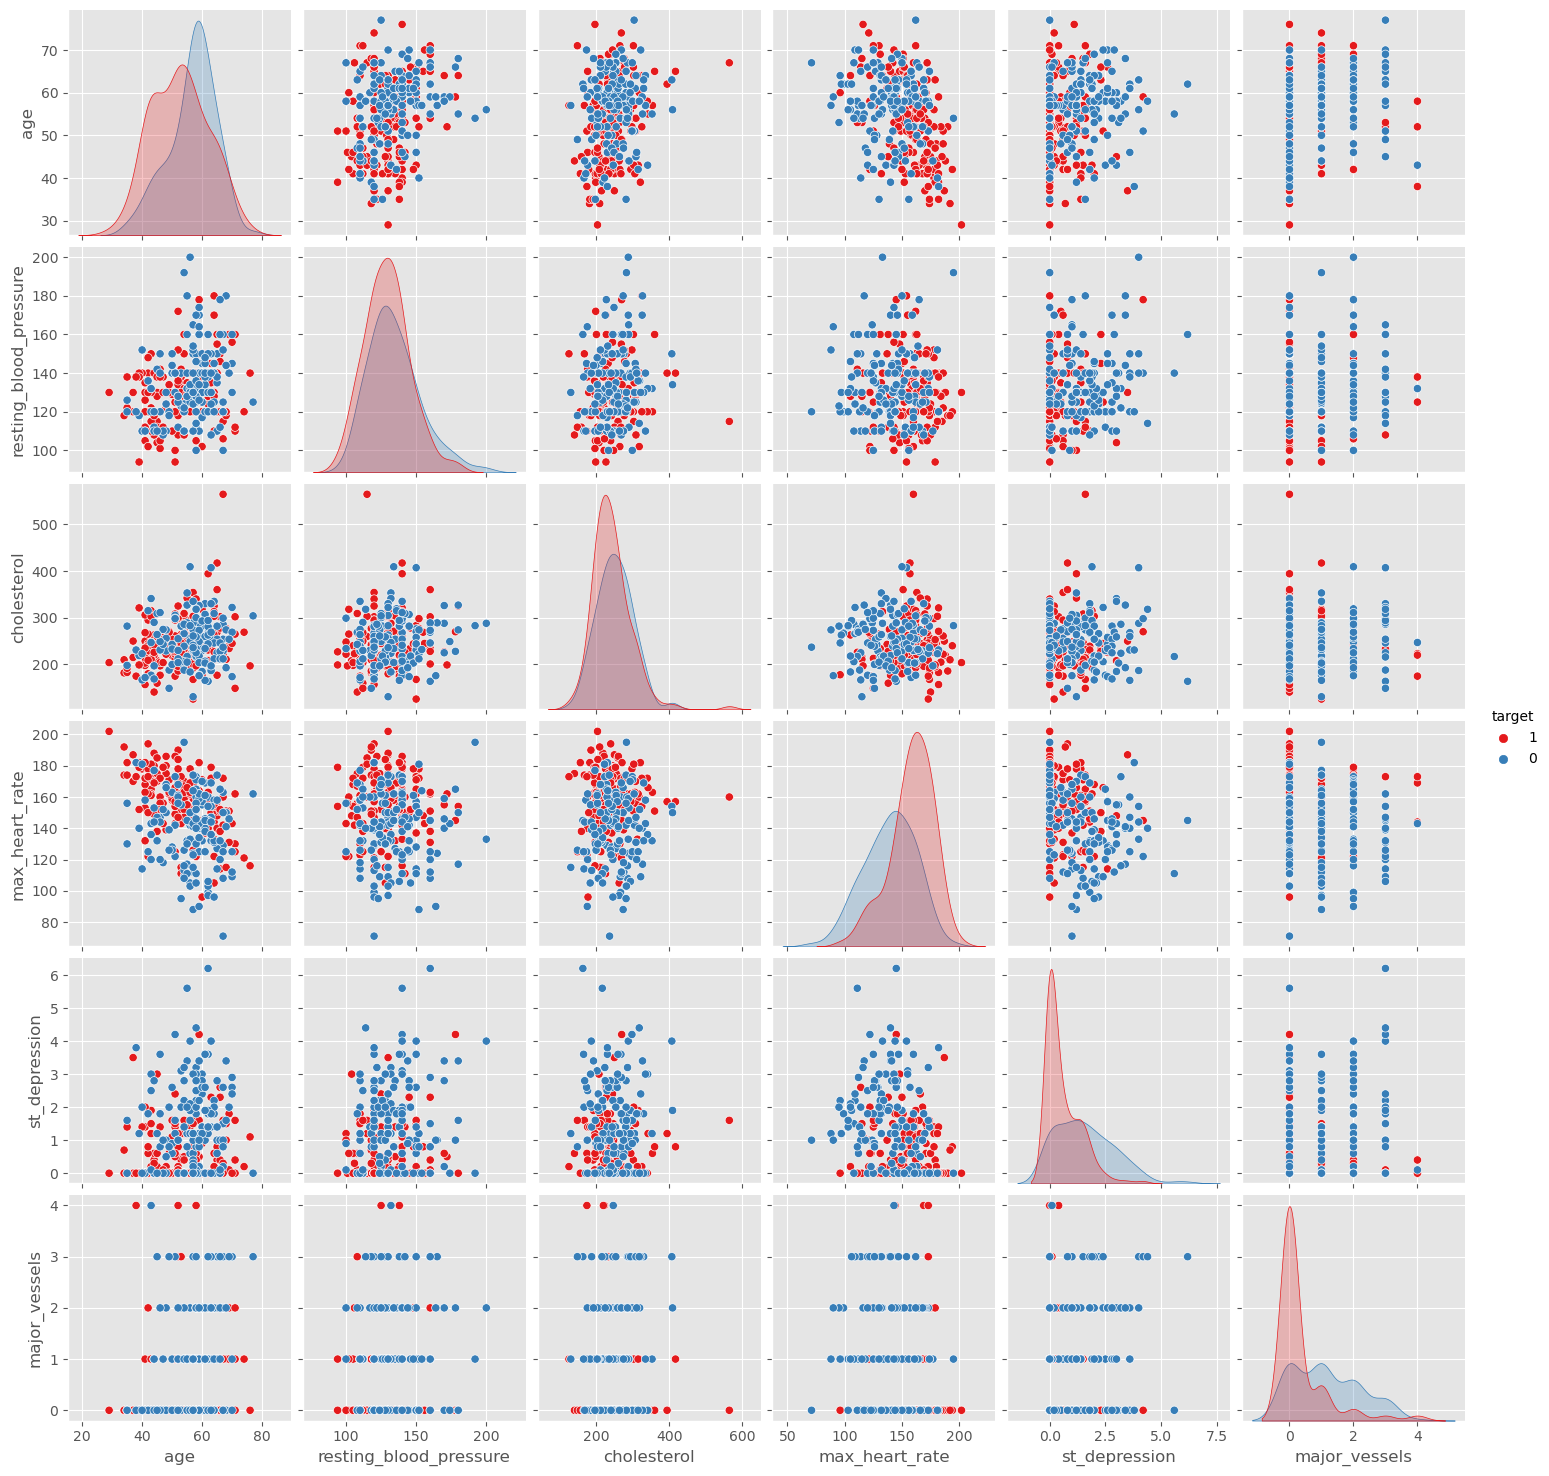

In [79]:
sns.pairplot(data, hue = 'target', palette='Set1')

In [86]:
# Combine 'target_0' and 'target_1' columns to form a single target variable
train['target'] = train['target_1']  # Assuming 'target_1' represents the positive class
train['target'] = train['target'].astype(int)  # Convert to integer type if necessary

# Separating features (X) and target (Y) variables
X_train = train.drop(['target_0', 'target_1', 'target'], axis=1)  # Drop encoded and combined target columns
Y_train = train['target']

# Assuming the same structure for the test set
test['target'] = test['target_1']  # Assuming 'target_1' represents the positive class
test['target'] = test['target'].astype(int)  # Convert to integer type if necessary
X_test = test.drop(['target_0', 'target_1', 'target'], axis=1)  # Drop encoded and combined target columns
Y_test = test['target']

# Re-creating and training the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Making predictions
pred = lr.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(Y_test, pred)
print(f"Accuracy: {accuracy}")

print(classification_report(Y_test, pred))


Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        45
           1       0.88      0.80      0.84        46

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [87]:
# Check the columns present in the data_dummy DataFrame
print(data_dummy.columns)



Index(['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate',
       'st_depression', 'major_vessels', 'sex_female', 'sex_male',
       'chest_pain_type_asymptomatic', 'chest_pain_type_atypical_angina',
       'chest_pain_type_non-anginal_pain', 'chest_pain_type_typical_angina',
       'fasting_blood_sugar_<_120mg/ml', 'fasting_blood_sugar_>_120mg/ml',
       'resting_ecg_abnormal', 'resting_ecg_hyper', 'resting_ecg_normal',
       'exercise_induced_angina_no', 'exercise_induced_angina_yes',
       'st_slope_downsloping', 'st_slope_flat', 'st_slope_upsloping',
       'thalessimia_fixed_defect', 'thalessimia_normal',
       'thalessimia_reversable_defect', 'target_0', 'target_1'],
      dtype='object')


In [88]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(Y_test, pred))

[[40  5]
 [ 9 37]]
